## Observations and Insights 

  - Strong positive correlation between Average Tumor Volume vs. Mouse Weight for Capomulin regimen: 0.84
  
  
  - Minimum Tumor Volume 22.050126 and max Tumor Volume 78.567014 across 
    regimens Capomulin, Ramicane, Infubinol, and Ceftamin are within IQR upper and lower bounds


  - Potential outliers for Infubinol, Values below 36.83290494999999
    Potential outlier for Infubinol: 36.321345799999996 (denoted with red square in box and whister plot below)


  - Line graph indicates that the majority of mice observed had an overall decrease in Tumor Volume (mm3) over timepoints. 
    Exception: Tumor Volume (mm3) increased for Mouse ID i557.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print("Unique mouse ID count in combined data: " + str(combined_data_df["Mouse ID"].nunique()))

Unique mouse ID count in combined data: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Get all the data for the duplicate mouse ID. duplicate Mouse ID and Timepoint
# duplicate mouse data
duplicate_df = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"]) == True]

# list of unique mouse ids
list_duplicate_mouseid = duplicate_df["Mouse ID"].unique()

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# loop through duplicate mouse ids (in this case only one mouse id)
for mouseid in list_duplicate_mouseid:
    combined_data_df.drop(combined_data_df.index[combined_data_df["Mouse ID"] == mouseid], inplace = True)
    clean_df = combined_data_df
    
    
# show clean_df    
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# verify clean_df = combined_data_df
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# verify record counts
combined_row_count = len(combined_data_df.index)
cleand_row_count = len(clean_df.index)

print(combined_row_count)
print(cleand_row_count)

1880
1880


In [6]:
# Checking the number of mice in the clean DataFrame.
print("Unique mouse ID count in cleaned data: " + str(clean_df["Mouse ID"].nunique()))

Unique mouse ID count in cleaned data: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_df = clean_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol = grouped_df["Tumor Volume (mm3)"].mean()
median_tumor_vol = grouped_df["Tumor Volume (mm3)"].median()
variance_tumor_vol = grouped_df["Tumor Volume (mm3)"].var()
std_tumor_vol = grouped_df["Tumor Volume (mm3)"].std()
sem_tumor_vol = grouped_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame(
    {"Mean": mean_tumor_vol,
     "Median": median_tumor_vol,
     "Variance": variance_tumor_vol,
     "Standard Deviation": std_tumor_vol,
     "Standard Error of the Mean": sem_tumor_vol
    })
summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_regimen_df = clean_df["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

summary_agg_stats_df = pd.DataFrame(
    {"": agg_drug_regimen_df})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total number of measurements taken')

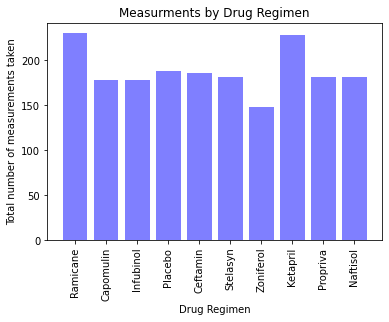

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

list_drug_regimen = clean_df["Drug Regimen"].unique()
x_axis = np.arange(len(list_drug_regimen))

# Create the ticks for our bar chart's x axis

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list_drug_regimen,rotation=90)

grouped_drug_df = clean_df.groupby(["Drug Regimen"])
group_row_count = grouped_drug_df["Mouse ID"].count()

plt.bar(x_axis,group_row_count, color='b', alpha=0.5, align='center')

# Give the chart a title, x label, and y label
plt.title("Measurments by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of measurements taken")

Text(0, 0.5, 'Total number of measurements taken')

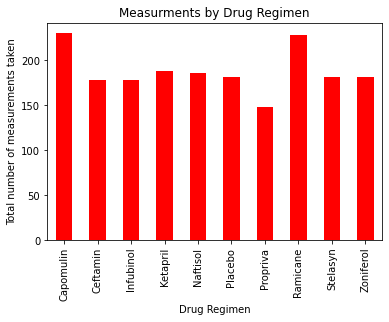

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Get attacker and defender king data
group_row_count.plot(kind="bar", facecolor="red")

# Give the chart a title, x label, and y label
plt.title("Measurments by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of measurements taken")

Text(0.5, 1.0, 'Test Subject Sex Distribution')

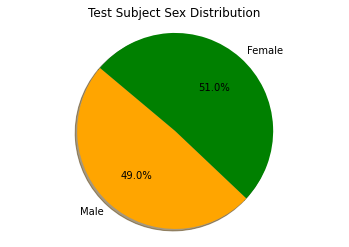

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_sex_df = clean_df.groupby(["Sex"])
group_sex_count = grouped_sex_df["Sex"].count()
sexes = clean_df["Sex"].unique()
colors = ["orange","green"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(group_sex_count,labels=sexes, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
#plt.show()

plt.title("Test Subject Sex Distribution")


<AxesSubplot:title={'center':'Test Subject Sex Distribution'}, ylabel='Sex'>

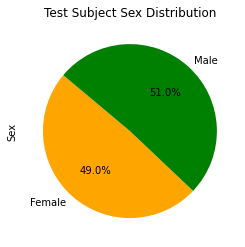

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Test Subject Sex Distribution")
group_sex_count.plot(kind="pie",colors=["orange","green"],startangle=140,autopct='%1.1f%%' )

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
groupby_mouseid_df = clean_df.groupby(["Mouse ID"])
max_timepoint = groupby_mouseid_df["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Combine the data into a single dataset
combined_data_df = pd.merge(clean_df, max_timepoint, on='Mouse ID')
tumor_vol_max_timepoint_df = combined_data_df.loc[combined_data_df["Timepoint_y"] == combined_data_df["Timepoint_x"]]

tumor_vol_max_timepoint_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []
for regimen in regimens:
    tumor_vols = tumor_vol_max_timepoint_df["Tumor Volume (mm3)"]

# sort the data to determine which could be outliers
tumor_vols.sort_values()    

9       22.050126
19      23.343598
39      28.430964
29      28.484033
49      29.128472
          ...    
1558    75.113288
1166    75.123690
1341    75.294936
1139    76.668817
1264    78.567014
Name: Tumor Volume (mm3), Length: 248, dtype: float64

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# use pandas to give quartile calculations
quartiles = tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 45.87586684749999
The upper quartile of tumor volume is: 65.05362410500001
The interquartile range of tumor volume is: 19.17775725750002
The the median of tumor volume is: 55.793278175 
Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers.


In [16]:
print(f"Minimum Tumor Volume 22.050126 and max Tumor Volume 78.567014 across regimens Capomulin, Ramicane, Infubinol, and Ceftamin are within IQR upper and lower bounds")


Minimum Tumor Volume 22.050126 and max Tumor Volume 78.567014 across regimens Capomulin, Ramicane, Infubinol, and Ceftamin are within IQR upper and lower bounds


In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Locate the rows which contain mice on each drug and get the tumor volumes

# empty list for regimen dfs
regimen_dfs = []

#loop through regimens, create a new df for each regimen with only data for specific regimen
for regimen in regimens:    
    regimen_df = tumor_vol_max_timepoint_df.loc[tumor_vol_max_timepoint_df["Drug Regimen"] == regimen]    
    regimen_dfs.append(regimen_df)        

In [24]:
# Determine outliers using upper and lower bounds

i = 0

regimen_tumor_vols = []

for regimen in regimens:    
    print(f"IQR for {regimen}")
    regimen_tumor_vol = regimen_dfs[i]["Tumor Volume (mm3)"]
    regimen_tumor_vols.append(regimen_tumor_vol)
    i += 1
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # use pandas to give quartile calculations
    quartiles = regimen_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers. \n")        
    print(f"-----------------------------------------------------------------\n\n")


    

IQR for Capomulin
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers. 

-----------------------------------------------------------------


IQR for Ramicane
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers. 

-----------------------------------------------------------------


IQR for Infubinol
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor

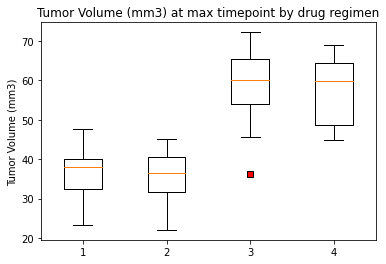

Potential outliers for Infubinol, Values below 36.83290494999999
Potential outlier for Infubinol: 36.321345799999996 (denoted above with red square)


In [31]:
data = [regimen_tumor_vols[0], regimen_tumor_vols[1],regimen_tumor_vols[2],regimen_tumor_vols[3]]

fig7, ax1 = plt.subplots()
                           
ax1.set_title(f"Tumor Volume (mm3) at max timepoint by drug regimen")
ax1.set_ylabel(f"Tumor Volume (mm3)")
red_square = dict(markerfacecolor='r', marker='s')                                                    

ax1.boxplot(data,flierprops=red_square,showfliers=True)

# trying to add drug regimen label to x-axis.. not working
ax1.tick_params = regimens
    
plt.show()

print("Potential outliers for Infubinol, Values below 36.83290494999999")
min_value_infubinol = regimen_tumor_vols[2].min()
print(f"Potential outlier for Infubinol: {min_value_infubinol} (denoted above with red square)")
      

## Line and Scatter Plots

Mouse ID                   v923
Drug Regimen          Capomulin
Sex                      Female
Age_months                   19
Weight (g)                   21
Timepoint                    20
Tumor Volume (mm3)      39.6483
Metastatic Sites              0
Name: 345, dtype: object
v923


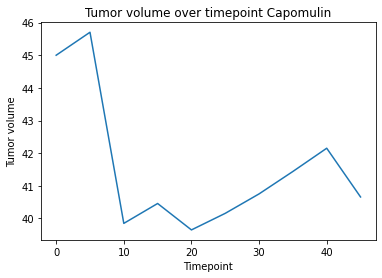

In [20]:
### Rerun this section to see a different random mouse/line plot) ###

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# get random index of mouse treated with Capomulin 
rand_index = np.random.randint(0, len(capomulin_df), size=1)
mouseid_df = capomulin_df.iloc[rand_index[0]]
print(mouseid_df)

mouse_id = mouseid_df["Mouse ID"]
print(mouse_id)

# get all data from clean_df on specific random mouse id
rand_mouse_df = clean_df.loc[clean_df["Mouse ID"] == mouse_id]

mouse_drug_regemin = mouseid_df["Drug Regimen"]
x_axis = rand_mouse_df["Timepoint"]

plt.plot(x_axis,rand_mouse_df["Tumor Volume (mm3)"])

# Give the chart a title, x label, and y label
plt.title(f"Tumor volume over timepoint {mouse_drug_regemin}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor volume")
plt.show()




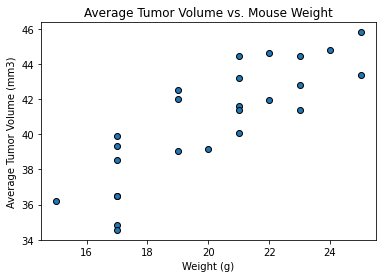

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group capomulin data by mouse id
group_capomulin_mouse_df = capomulin_df.groupby(["Mouse ID"])

# set mean_tumor_vol
mean_tumor_vol = group_capomulin_mouse_df["Tumor Volume (mm3)"].mean()

# set mouse_weight (weight is the same for mice across timepoints)
weight_mouse = group_capomulin_mouse_df["Weight (g)"].max()


plt.title("Average Tumor Volume vs. Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.scatter(weight_mouse,mean_tumor_vol,marker="o",edgecolors="black")
plt.show()

## Correlation and Regression

The correlation between Average Tumor Volume vs. Mouse Weight for Capomulin regimen is 0.84


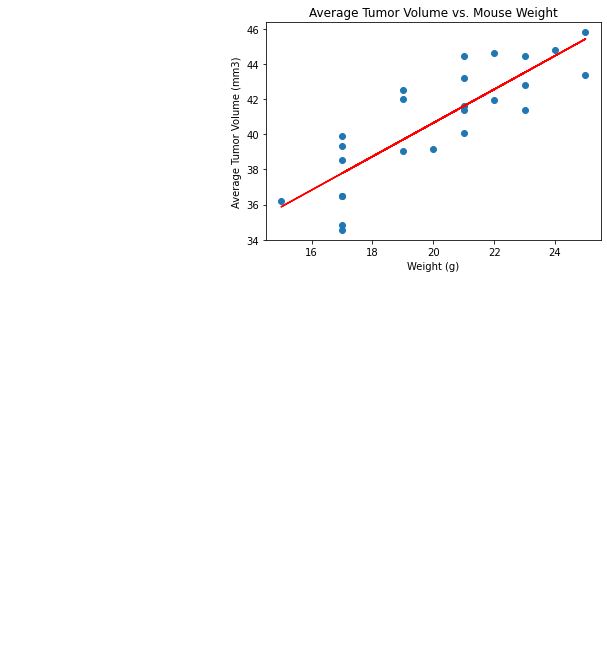

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight_mouse,mean_tumor_vol)
print(f"The correlation between Average Tumor Volume vs. Mouse Weight for Capomulin regimen is {round(correlation[0],2)}")

x_values = weight_mouse
y_values = mean_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()



